In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
path = 'Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx'
data = pd.read_excel(path)
data

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0           267.6805        0.7376    0.9902  0.7453     0.8963   
1           312.3614        0.8275    0.9916  0.7151     0.8440   
2           301.9822        0.8749    0.9857  0.7400     0.7674   
3           290.8899        0.8123    0.9902  0.7396     0.8486   
4           290.1207        0.8187    0.9850  0.6752     0.8338   
...              ...           ...       ...     ...        ...   
2495        318.4289        0.9340    0.9907  0.4888     0.6672   
2496        297.7874        0.9101    0.9919  0.6002     0.7444   
2497        334.7199        0.8990    0.9920  0.7643     0.7549   
2498        319.1758        0.9130    0.9890  0.7374     0.7185   
2499        328.8485        0.8621    0.9901  0.7360     0.7933   

      Aspect_Ration  Compactness          Class  
0            1.4809       0.8207     Çerçevelik  
1            1.7811       0.7487     Çerçevelik  
2            2.0651       0.6929     Çerçevelik  
3            1.7146       0.7624     Çerçevelik  
4            1.7413       0.7557     Çerçevelik  
...             ...          ...            ...  
2495         2.7996       0.5973  Ürgüp Sivrisi  
2496         2.4134       0.6433  Ürgüp Sivrisi  
2497         2.2828       0.6599  Ürgüp Sivrisi  
2498         2.4513       0.6359  Ürgüp Sivrisi  
2499         1.9735       0.7104  Ürgüp Sivrisi  

[2500 rows x 13 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


C:\Users\procns\AppData\Local\Temp\ipykernel_1272\2514877907.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),vmin=-1,vmax=1, annot=True)


<Axes: >

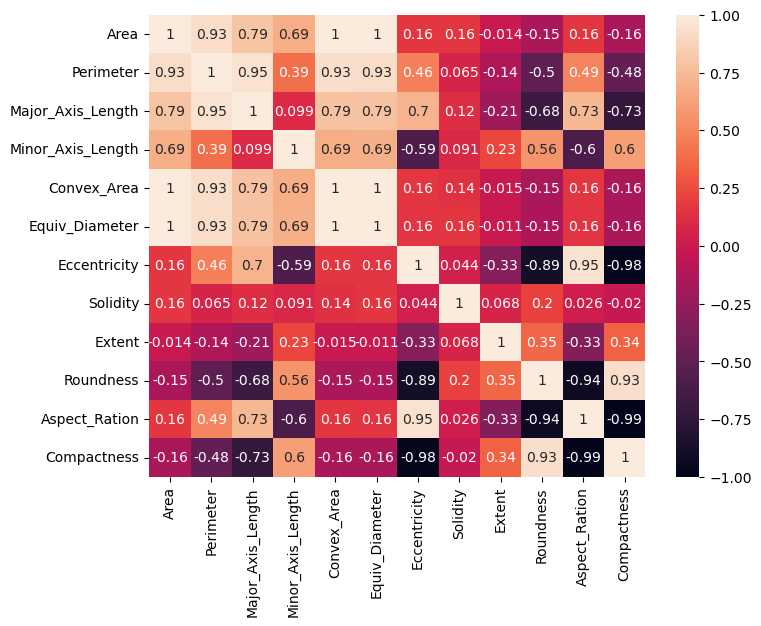

In [4]:
## Viz

plt.figure(figsize=[8,6])
sns.heatmap(data.corr(),vmin=-1,vmax=1, annot=True)

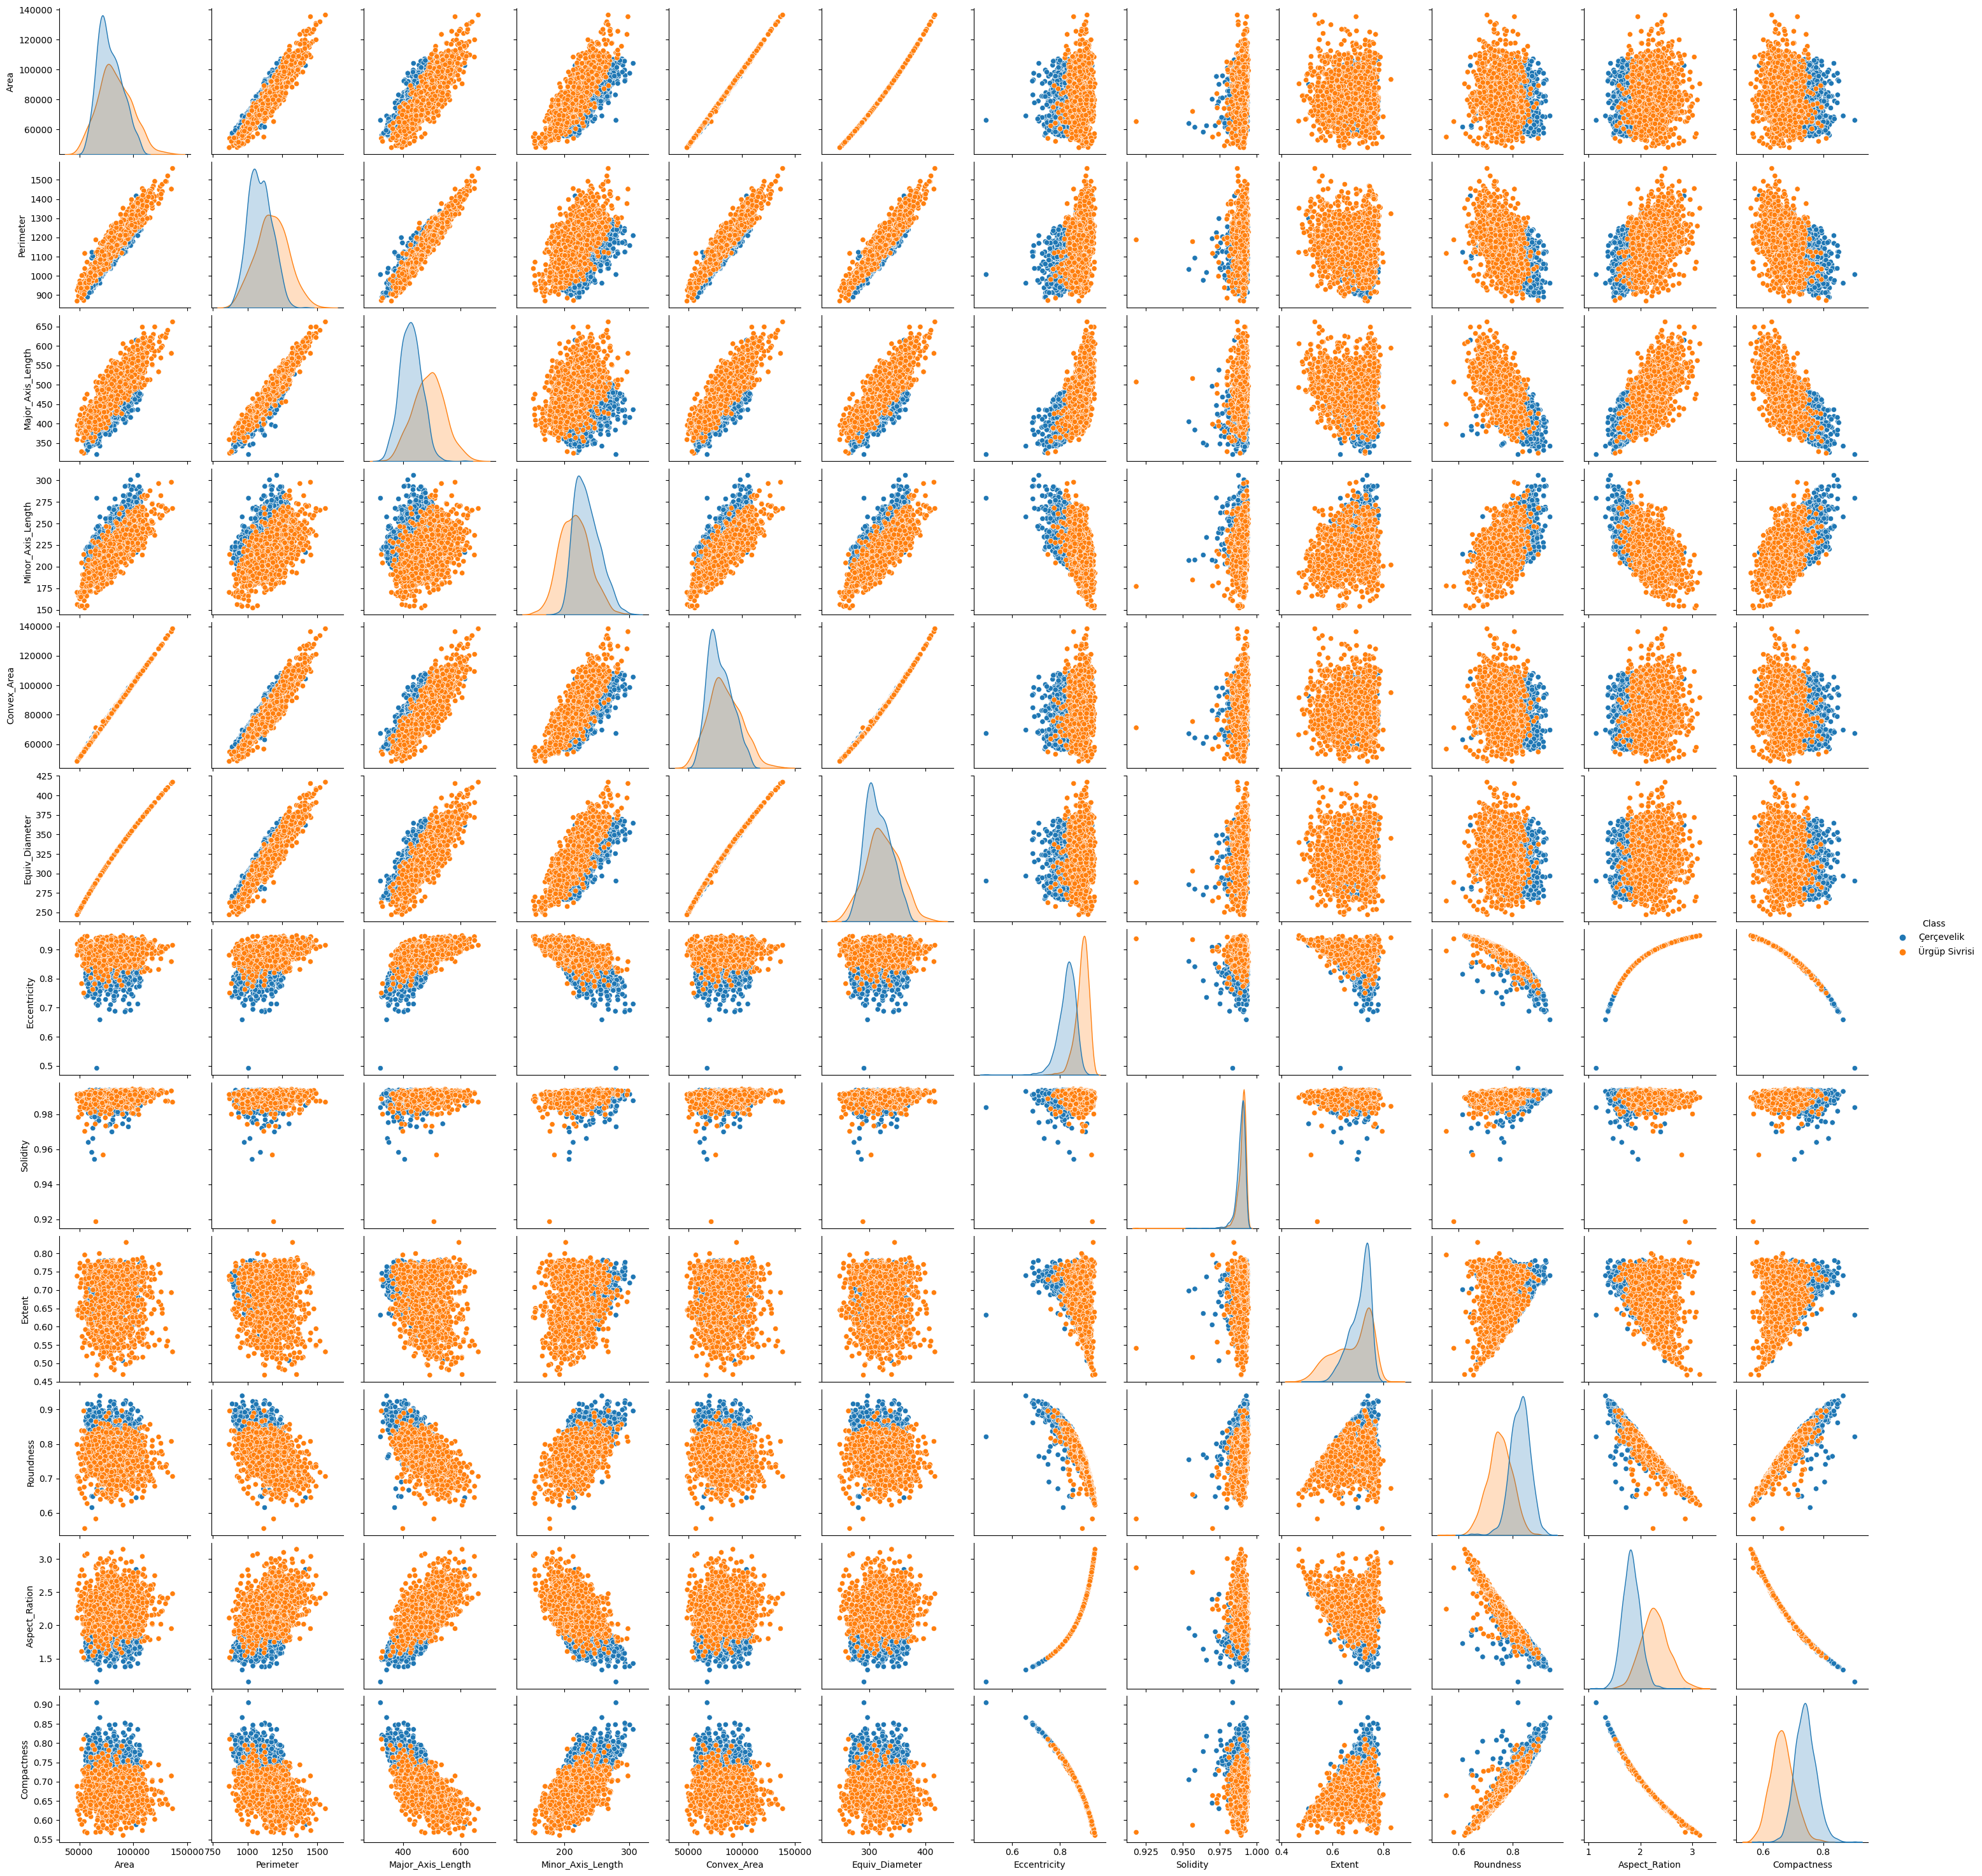

In [27]:
sns.pairplot(data, hue='Class')

In [4]:
X_data = data.drop(['Class'], axis = 1)
y_data = data['Class']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, stratify= y_data)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [10]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS



--- SVM Classifier ---
0.858


<Axes: title={'center': 'SVM Confusion Matrix'}>

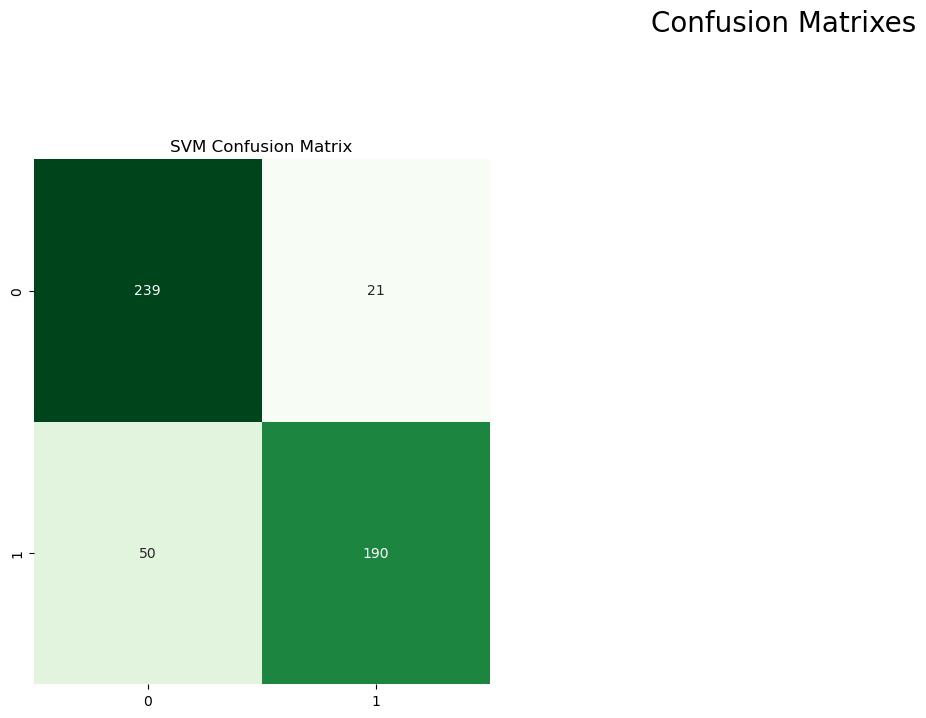

In [23]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
#print(confusion_matrix(y_test, pred_svm))

cm_svm = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Greens",fmt="d")


--- Radom Forest ---
0.872


<Axes: title={'center': 'Random Forest Confusion Matrix'}>

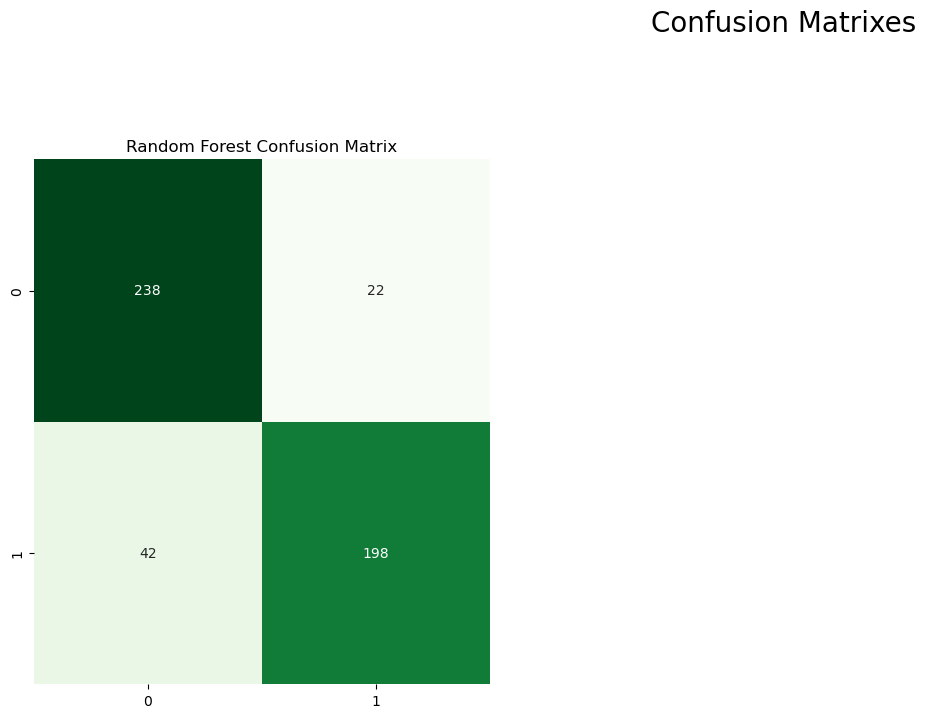

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_scaled, y_train)
pred_rf = rf_clf.predict(test_scaled)
print(accuracy_score(y_test,pred_rf))
#print (confusion_matrix(y_test, pred_rf))

cm_rf = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,cbar=False,annot=True,cmap="Greens",fmt="d")


--- Logistic Regression Classifier ---
0.846


<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

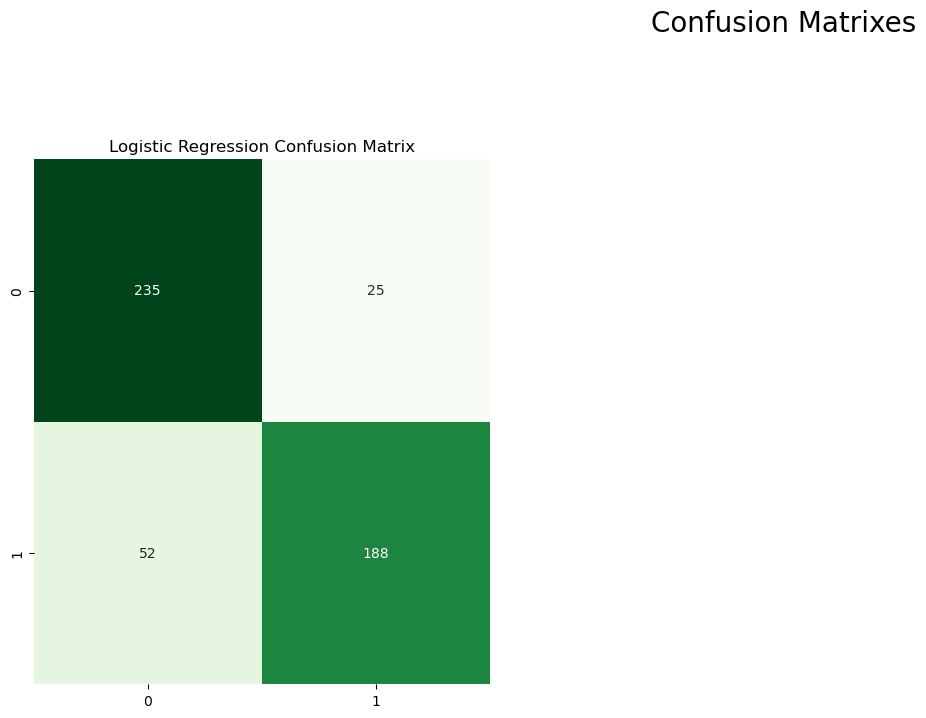

In [24]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(train_scaled, y_train)

pred_lr = clf_lr.predict(test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
#print (confusion_matrix(y_test, pred_lr))

cm_lr = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")


--- Decision Tree Classifier ---
0.846
[[224  36]
 [ 41 199]]


<Axes: title={'center': 'Decision Tree Confusion Matrix'}>

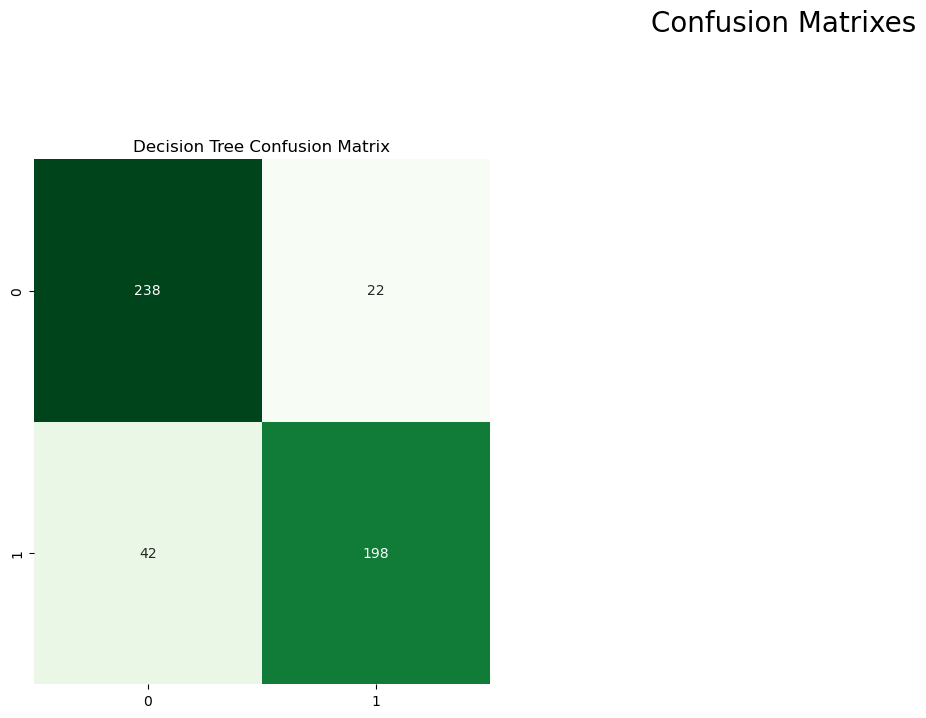

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_scaled, y_train)

pred_lr = clf_dt.predict(test_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

cm_dt = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")